**Steps**

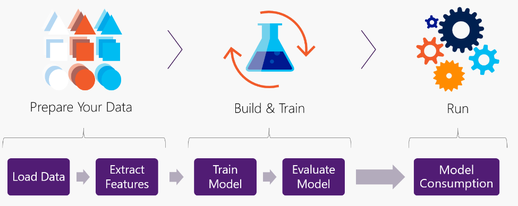

**Importing Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


import os

In [ ]:
df = pd.read_excel('/content/excel provath_modified.xlsx')

In [ ]:
df

,Fine_Aggregate_Binder,Coarse_Aggregat_Binder,Binder_kg,percentage_of_SiO2,percentage_of_CaO,percentage_of_Al2O3,Alkaline liquid_by_binder,NaOH_Molarity,Na2SiO3 _by_NaOH,Additional_Water _percentage_of_binder,SP_percentage_ of_binder,Curing_temp _0C,Age,Output_CS_converted_to_150mm_cube_Mpa
0,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,3,19.14
1,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,7,22.88
2,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,14,24.53
3,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,28,25.41
4,2.116667,2.338889,360.0,61.000,2.640,22.830,0.50,10.0,1.000000,0.0,1.0,23.0,3,8.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.637500,3.040000,400.0,51.335,6.255,25.705,0.35,14.0,1.500000,2.0,1.5,20.0,7,15.40
1257,1.637500,3.040000,400.0,48.960,10.610,24.210,0.35,14.0,1.500000,2.0,1.5,20.0,7,27.50
1258,1.627500,3.022500,400.0,51.335,6.255,25.705,0.40,14.0,2.501094,0.0,0.0,20.0,28,44.00
1259,1.627500,3.022500,400.0,48.960,10.610,24.210,0.40,14.0,2.501094,0.0,0.0,20.0,28,46.06


In [ ]:
df.head()

,Fine_Aggregate_Binder,Coarse_Aggregat_Binder,Binder_kg,percentage_of_SiO2,percentage_of_CaO,percentage_of_Al2O3,Alkaline liquid_by_binder,NaOH_Molarity,Na2SiO3 _by_NaOH,Additional_Water _percentage_of_binder,SP_percentage_ of_binder,Curing_temp _0C,Age,Output_CS_converted_to_150mm_cube_Mpa
0,2.108333,2.327778,360.0,92.21,0.51,0.38,0.5,10.0,1.0,0.0,1.0,23.0,3,19.14
1,2.108333,2.327778,360.0,92.21,0.51,0.38,0.5,10.0,1.0,0.0,1.0,23.0,7,22.88
2,2.108333,2.327778,360.0,92.21,0.51,0.38,0.5,10.0,1.0,0.0,1.0,23.0,14,24.53
3,2.108333,2.327778,360.0,92.21,0.51,0.38,0.5,10.0,1.0,0.0,1.0,23.0,28,25.41
4,2.116667,2.338889,360.0,61.00,2.64,22.83,0.5,10.0,1.0,0.0,1.0,23.0,3,8.03


In [ ]:
uniques = pd.DataFrame(columns=["Feature", "Uniques", "num_unique"])

In [ ]:
for i in range(len(df.columns)):
    uniques.loc[i] = [df.columns[i]] + [df[df.columns[i]].unique()] + [df[df.columns[i]].nunique()]

In [ ]:
uniques

,Feature,Uniques,num_unique
0,Fine_Aggregate_Binder,"[2.1083333333333334, 2.1166666666666667, 2.255...",143
1,Coarse_Aggregat_Binder,"[2.327777777777778, 2.338888888888889, 2.49166...",145
2,Binder_kg,"[360.0, 408.00000000000006, 408.0, 490.0, 489....",67
3,percentage_of_SiO2,"[92.21, 61.0, 27.56, 64.12100000000001, 67.242...",225
4,percentage_of_CaO,"[0.51, 2.64, 43.39, 2.427, 2.214, 39.102, 34.8...",220
5,percentage_of_Al2O3,"[0.38, 22.83, 16.19, 20.585, 18.33999999999999...",223
6,Alkaline liquid_by_binder,"[0.5, 0.41990196078431363, 0.4199019607843137,...",74
7,NaOH_Molarity,"[10.0, 6.0, 8.0, 12.0, 14.0, 2.0, 0.5, 1.0, 3....",15
8,Na2SiO3 _by_NaOH,"[1.0, 1.5, 2.0, 2.5, 3.0, 2.50109409190372, 2....",61
9,Additional_Water _percentage_of_binder,"[0.0, 4.0, 4.000000000000001, 3.0, 22.0, 9.999...",83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fine_Aggregate_Binder                   1261 non-null   float64
 1   Coarse_Aggregat_Binder                  1261 non-null   float64
 2   Binder_kg                               1261 non-null   float64
 3   percentage_of_SiO2                      1261 non-null   float64
 4   percentage_of_CaO                       1261 non-null   float64
 5   percentage_of_Al2O3                     1261 non-null   float64
 6   Alkaline liquid_by_binder               1261 non-null   float64
 7   NaOH_Molarity                           1261 non-null   float64
 8   Na2SiO3 _by_NaOH                        1261 non-null   float64
 9   Additional_Water _percentage_of_binder  1261 non-null   float64
 10  SP_percentage_ of_binder                1261 non-null   floa

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fine_Aggregate_Binder,1261.0,1.739506,0.310784,1.000000,1.561265,1.637500,2.000000,2.755725
Coarse_Aggregat_Binder,1261.0,2.876511,0.363017,1.658675,2.682927,3.001229,3.048223,3.647799
Binder_kg,1261.0,396.086162,29.752888,318.000000,381.000000,400.000000,405.000000,508.000000
percentage_of_SiO2,1261.0,48.127249,8.889354,27.560000,42.662000,48.445000,52.237300,92.210000
percentage_of_CaO,1261.0,16.597939,10.496243,0.510000,8.432500,14.956955,24.800000,43.390000
percentage_of_Al2O3,1261.0,21.795640,5.743623,0.380000,18.182000,22.120000,26.611000,32.432000
Alkaline liquid_by_binder,1261.0,0.424315,0.062769,0.280000,0.399985,0.400000,0.450000,0.790000
NaOH_Molarity,1261.0,9.812054,3.455552,0.500000,8.000000,10.000000,12.000000,19.000000
Na2SiO3 _by_NaOH,1261.0,1.894821,0.700185,0.333333,1.220588,2.018868,2.500000,4.266667
Additional_Water _percentage_of_binder,1261.0,5.588873,8.560488,0.000000,0.000000,0.000000,10.000000,51.504408


In [ ]:
df.isna().sum()

Fine_Aggregate_Binder                     0
Coarse_Aggregat_Binder                    0
Binder_kg                                 0
percentage_of_SiO2                        0
percentage_of_CaO                         0
percentage_of_Al2O3                       0
Alkaline liquid_by_binder                 0
NaOH_Molarity                             0
Na2SiO3 _by_NaOH                          0
Additional_Water _percentage_of_binder    0
SP_percentage_ of_binder                  0
Curing_temp _0C                           0
Age                                       0
Output_CS_converted_to_150mm_cube_Mpa     1
dtype: int64

**PreProcessing**

Haldling Missing Value

In [ ]:
df

,Fine_Aggregate_Binder,Coarse_Aggregat_Binder,Binder_kg,percentage_of_SiO2,percentage_of_CaO,percentage_of_Al2O3,Alkaline liquid_by_binder,NaOH_Molarity,Na2SiO3 _by_NaOH,Additional_Water _percentage_of_binder,SP_percentage_ of_binder,Curing_temp _0C,Age,Output_CS_converted_to_150mm_cube_Mpa
0,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,3,19.14
1,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,7,22.88
2,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,14,24.53
3,2.108333,2.327778,360.0,92.210,0.510,0.380,0.50,10.0,1.000000,0.0,1.0,23.0,28,25.41
4,2.116667,2.338889,360.0,61.000,2.640,22.830,0.50,10.0,1.000000,0.0,1.0,23.0,3,8.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.637500,3.040000,400.0,51.335,6.255,25.705,0.35,14.0,1.500000,2.0,1.5,20.0,7,15.40
1257,1.637500,3.040000,400.0,48.960,10.610,24.210,0.35,14.0,1.500000,2.0,1.5,20.0,7,27.50
1258,1.627500,3.022500,400.0,51.335,6.255,25.705,0.40,14.0,2.501094,0.0,0.0,20.0,28,44.00
1259,1.627500,3.022500,400.0,48.960,10.610,24.210,0.40,14.0,2.501094,0.0,0.0,20.0,28,46.06


In [ ]:
df['Output_CS_converted_to_150mm_cube_Mpa'] = df['Output_CS_converted_to_150mm_cube_Mpa'].fillna(df['Output_CS_converted_to_150mm_cube_Mpa'].mean())

In [ ]:
df.isna().sum()

Fine_Aggregate_Binder                     0
Coarse_Aggregat_Binder                    0
Binder_kg                                 0
percentage_of_SiO2                        0
percentage_of_CaO                         0
percentage_of_Al2O3                       0
Alkaline liquid_by_binder                 0
NaOH_Molarity                             0
Na2SiO3 _by_NaOH                          0
Additional_Water _percentage_of_binder    0
SP_percentage_ of_binder                  0
Curing_temp _0C                           0
Age                                       0
Output_CS_converted_to_150mm_cube_Mpa     0
dtype: int64

**Data Visualization**

(array([561., 142.,  40., 394.,   0.,   0.,  86.,   0.,   0.,  38.]),
 array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. ]),
 <a list of 10 Patch objects>)

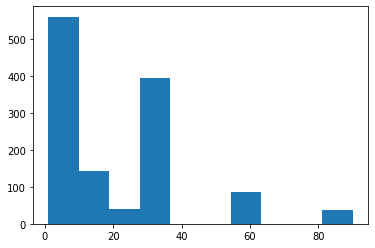

In [ ]:
plt.hist(df.Age)

(array([ 99., 201., 203., 244., 207., 135.,  95.,  54.,  21.,   2.]),
 array([ 0. ,  8.3, 16.6, 24.9, 33.2, 41.5, 49.8, 58.1, 66.4, 74.7, 83. ]),
 <a list of 10 Patch objects>)

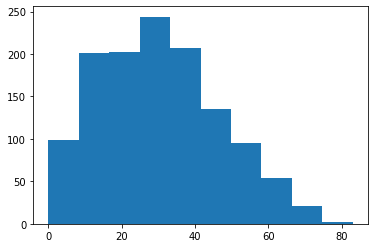

In [ ]:
plt.hist(df.Output_CS_converted_to_150mm_cube_Mpa)

(array([ 56.,  88.,  20.,   9., 235., 498., 130., 165.,  38.,  22.]),
 array([ 0.5 ,  2.35,  4.2 ,  6.05,  7.9 ,  9.75, 11.6 , 13.45, 15.3 ,
        17.15, 19.  ]),
 <a list of 10 Patch objects>)

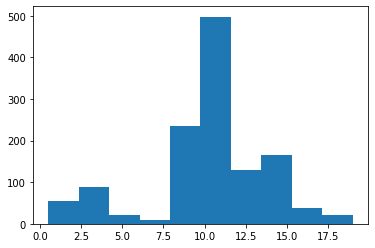

In [ ]:
plt.hist(df.NaOH_Molarity)

<Figure size 720x576 with 0 Axes>

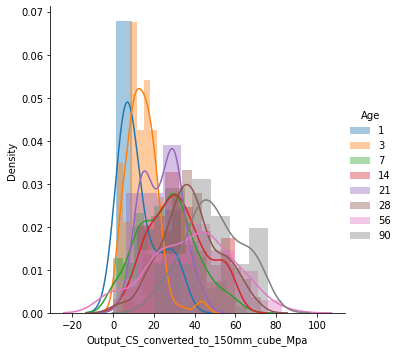

In [ ]:
plt.figure(figsize=[10, 8])
sns.FacetGrid(df,hue='Age',size=5).map(sns.distplot,'Output_CS_converted_to_150mm_cube_Mpa').add_legend()

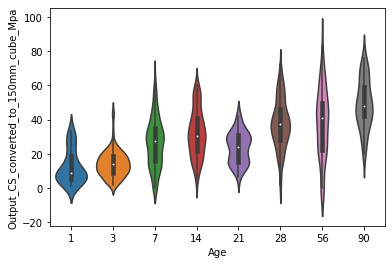

In [ ]:
sns.violinplot(x='Age',y='Output_CS_converted_to_150mm_cube_Mpa',data=df,size=6)

Text(0.5, 1.0, 'Curing_temperature Vs Output_CS')

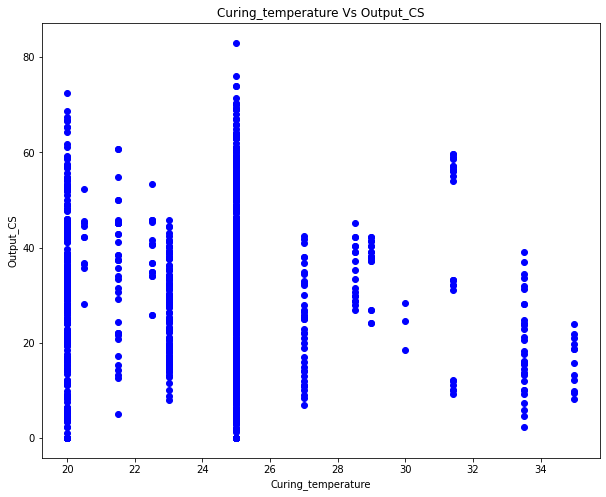

In [ ]:
plt.figure(figsize=[10, 8])
plt.scatter(df['Curing_temp _0C'],df['Output_CS_converted_to_150mm_cube_Mpa'],color=['b'])
plt.xlabel('Curing_temperature')
plt.ylabel('Output_CS')
plt.title('Curing_temperature Vs Output_CS')

Text(0.5, 1.0, 'Binder per kg VS Output_CS')

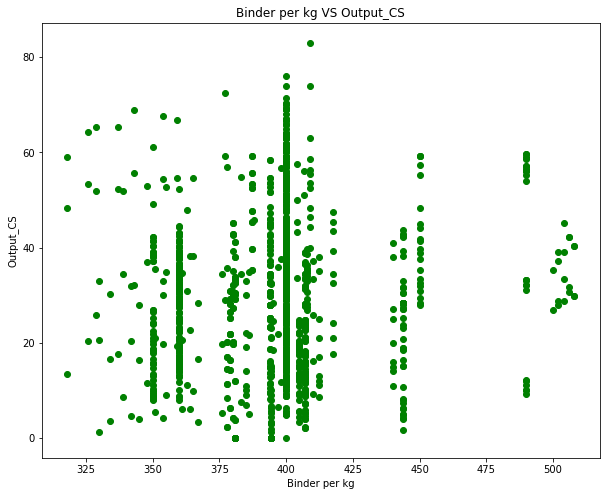

In [ ]:
plt.figure(figsize=[10, 8])
plt.scatter(df['Binder_kg'],df['Output_CS_converted_to_150mm_cube_Mpa'],color=['g'])
plt.xlabel('Binder per kg')
plt.ylabel('Output_CS')
plt.title('Binder per kg VS Output_CS')

In [ ]:
df.columns

Index(['Fine_Aggregate_Binder', 'Coarse_Aggregat_Binder', 'Binder_kg',
       'percentage_of_SiO2', 'percentage_of_CaO', 'percentage_of_Al2O3',
       'Alkaline liquid_by_binder  ', 'NaOH_Molarity', 'Na2SiO3 _by_NaOH',
       'Additional_Water _percentage_of_binder', 'SP_percentage_ of_binder',
       'Curing_temp _0C', 'Age', 'Output_CS_converted_to_150mm_cube_Mpa'],
      dtype='object')

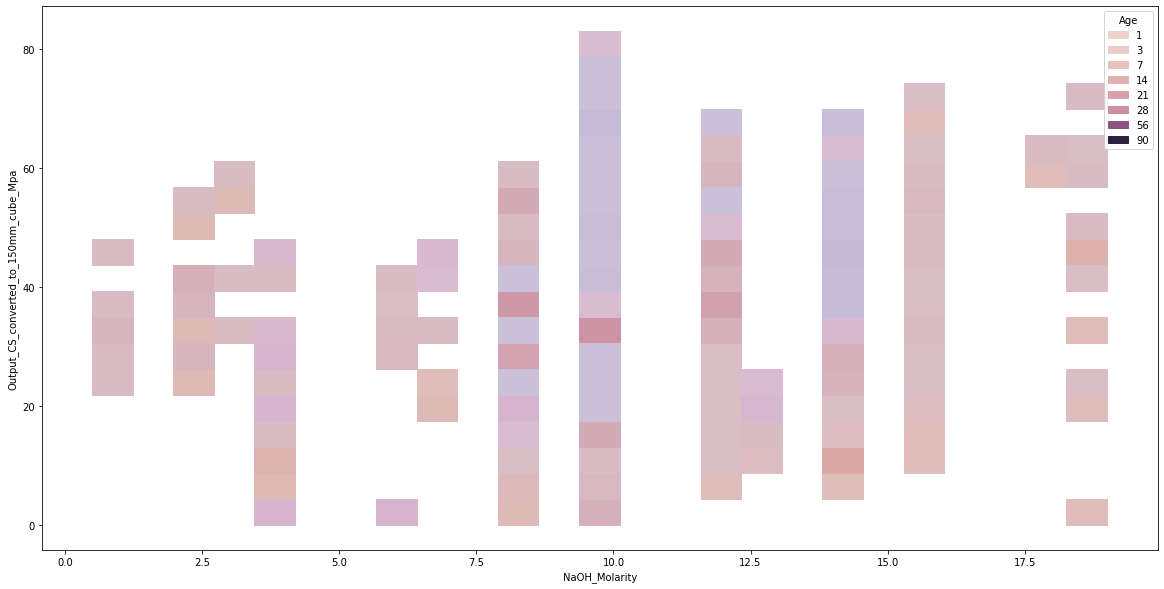

In [ ]:
plt.figure(figsize=[20, 10])
sns.histplot(data=df, x='NaOH_Molarity', y='Output_CS_converted_to_150mm_cube_Mpa', hue='Age')

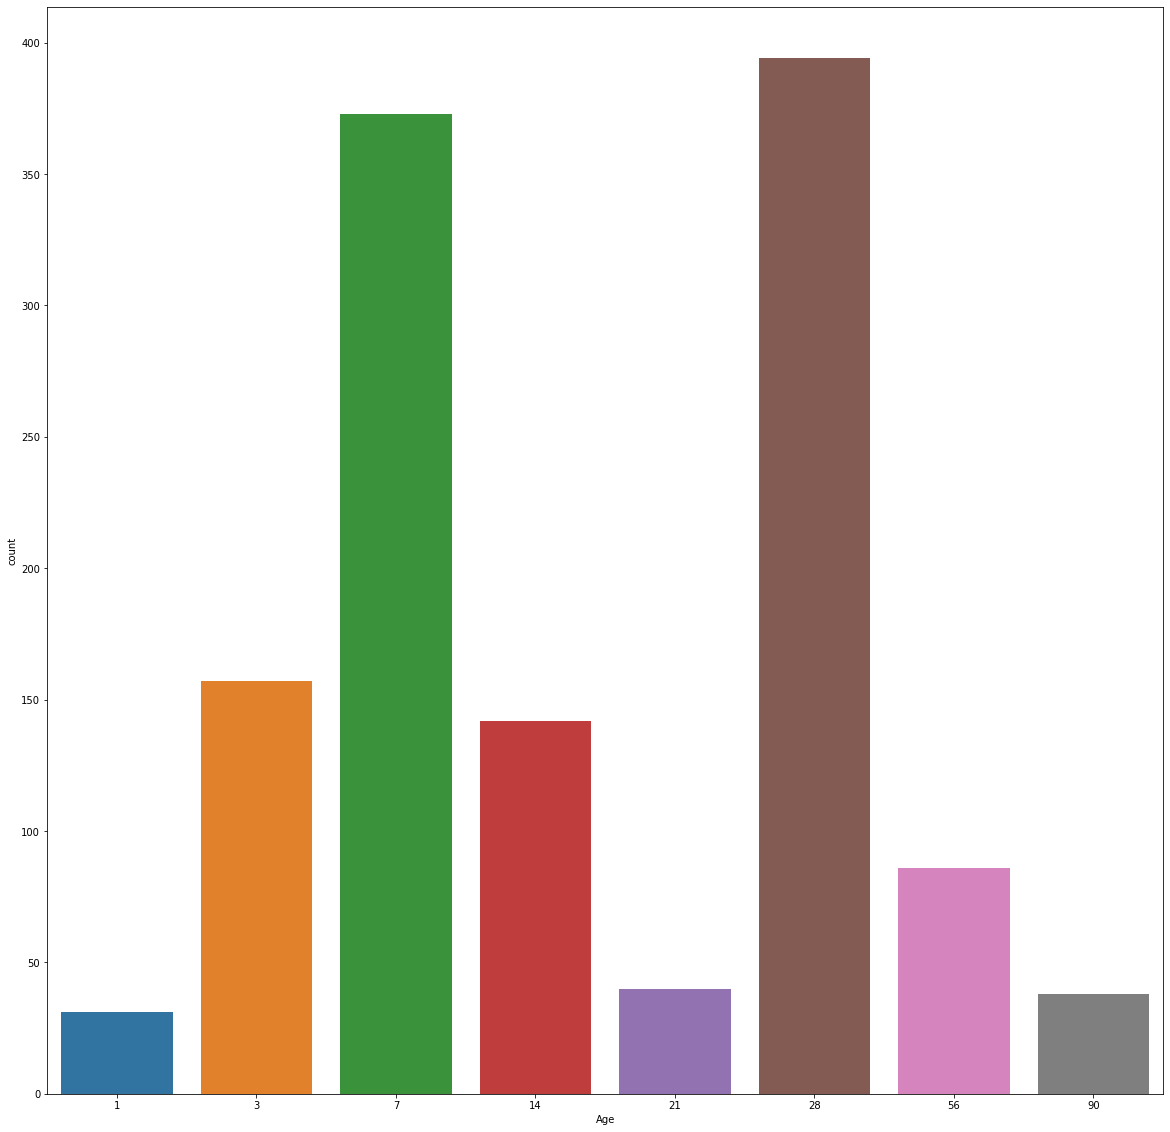

In [ ]:
plt.figure(figsize=[20, 20])
sns.countplot(data=df, x='Age')

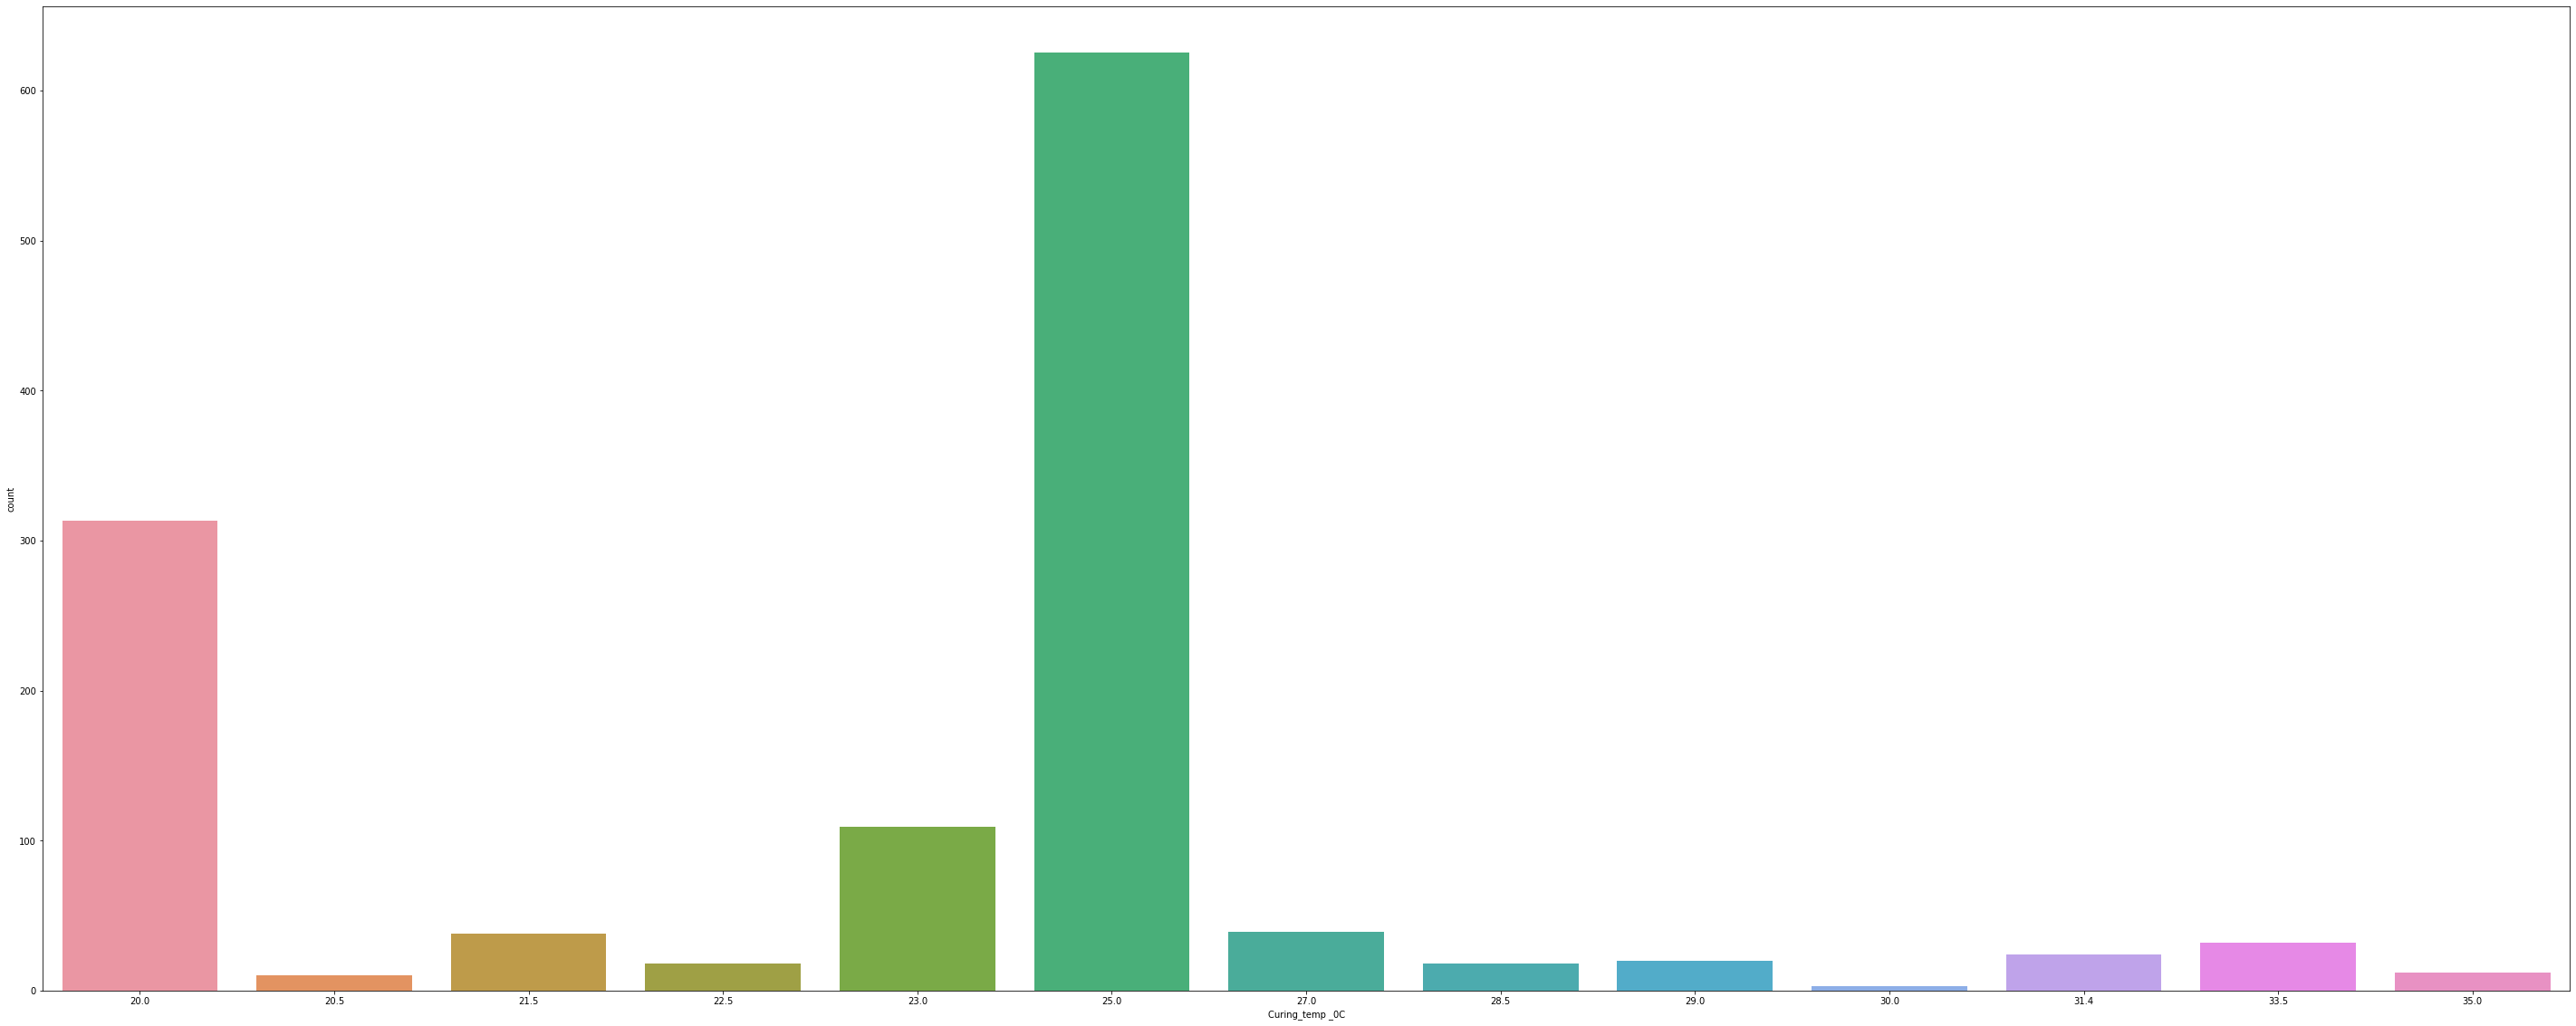

In [ ]:
plt.figure(figsize=[50, 20])
sns.countplot(data=df, x='Curing_temp _0C')

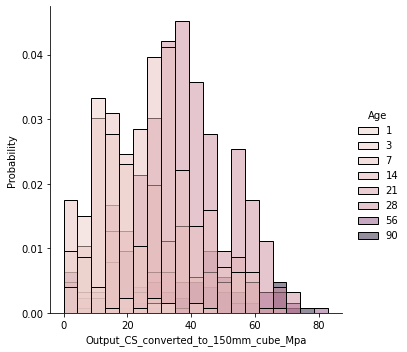

In [ ]:
sns.displot(x='Output_CS_converted_to_150mm_cube_Mpa',
           hue='Age', 
           data=df,
           stat='probability')

Internet improves your marks!

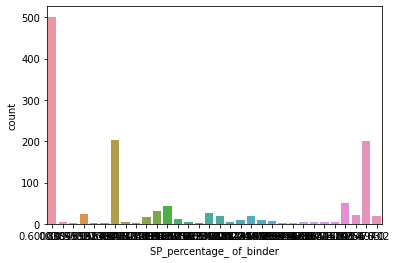

In [ ]:
sns.countplot(data=df, x='SP_percentage_ of_binder')

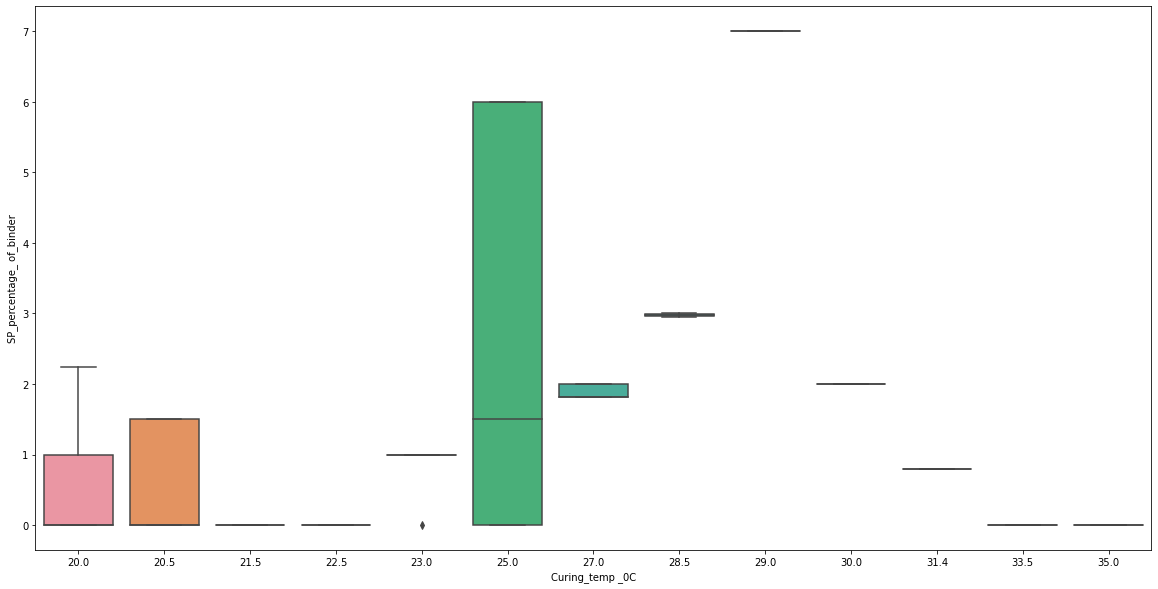

In [ ]:
plt.figure(figsize=[20, 10])
sns.boxplot(x='Curing_temp _0C', y='SP_percentage_ of_binder', data=df)

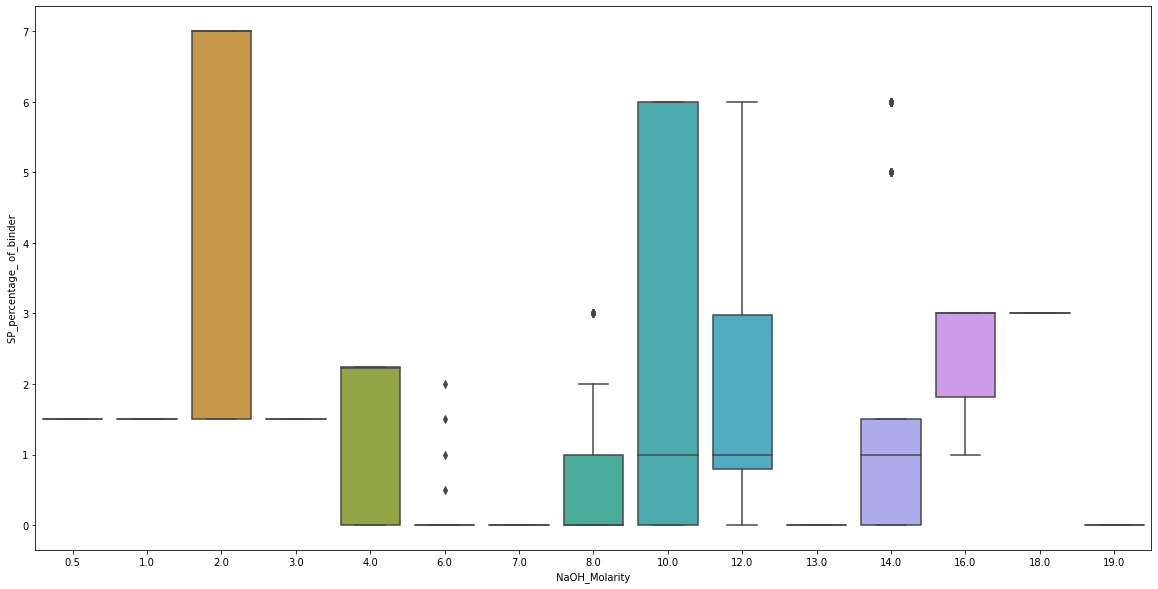

In [ ]:
plt.figure(figsize=[20, 10])
sns.boxplot(x='NaOH_Molarity', y='SP_percentage_ of_binder', data=df)

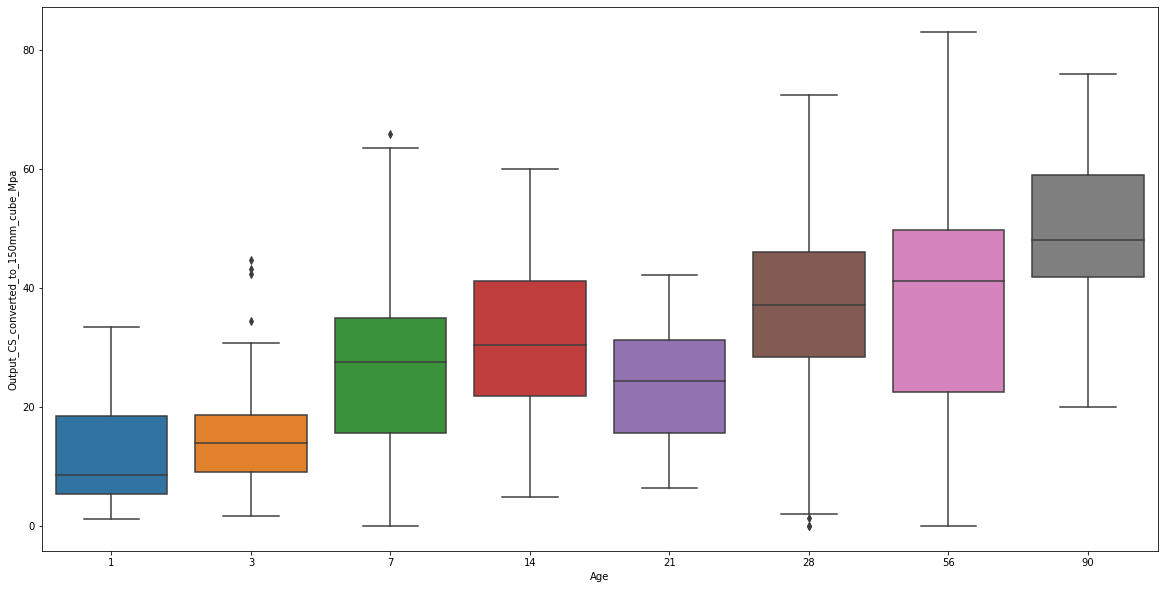

In [ ]:
plt.figure(figsize=[20, 10])
sns.boxplot(x='Age', y='Output_CS_converted_to_150mm_cube_Mpa', data=df)

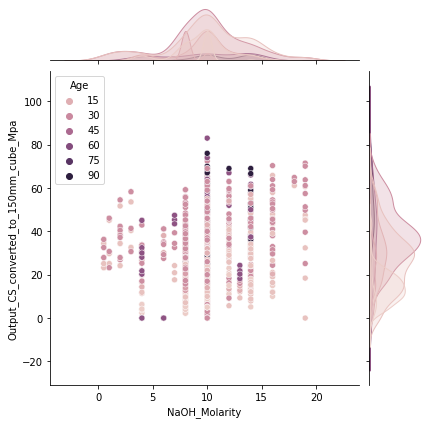

In [ ]:
sns.jointplot(x='NaOH_Molarity', y='Output_CS_converted_to_150mm_cube_Mpa', 
              data=df, kind='scatter', hue='Age');

In [ ]:
cols_num = list(df.dtypes[df.dtypes == 'float64'].index[0:])

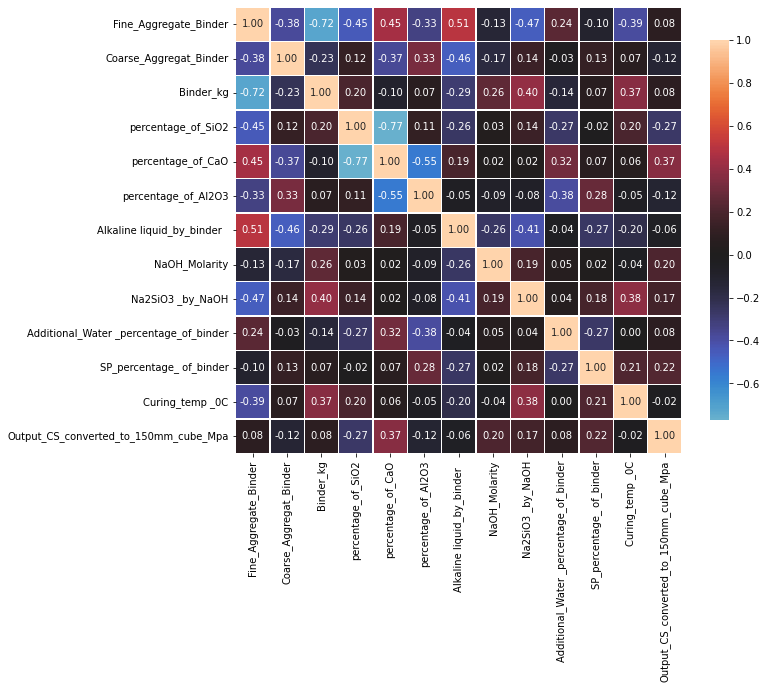

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df[cols_num])

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

2

In [ ]:
corr_features

{'Binder_kg', 'percentage_of_CaO'}

In [ ]:
df['Output_CS_converted_to_150mm_cube_Mpa'] = df['Output_CS_converted_to_150mm_cube_Mpa'].apply(np.float64)
y = df['Output_CS_converted_to_150mm_cube_Mpa']

X = df.drop(['Output_CS_converted_to_150mm_cube_Mpa'], axis=1)



**Train-test_split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=17)

In [ ]:
X_train

,Fine_Aggregate_Binder,Coarse_Aggregat_Binder,Binder_kg,percentage_of_SiO2,percentage_of_CaO,percentage_of_Al2O3,Alkaline liquid_by_binder,NaOH_Molarity,Na2SiO3 _by_NaOH,Additional_Water _percentage_of_binder,SP_percentage_ of_binder,Curing_temp _0C,Age
989,1.615000,3.030000,400.00,50.480000,12.710000,28.384000,0.350000,10.0,1.999786,0.000000,6.000000,25.0,56
457,1.652500,3.067500,400.00,49.946000,10.440000,23.848000,0.350000,10.0,1.978723,0.000000,1.000000,20.0,3
236,1.610000,3.015000,400.00,52.515000,8.680000,30.157000,0.350000,10.0,1.999786,3.000000,6.000000,25.0,14
176,1.627500,3.022500,400.00,48.246000,5.921000,26.855000,0.350000,14.0,2.500000,0.000000,0.000000,21.5,56
384,2.000000,2.644737,380.00,38.894737,17.805263,28.452632,0.560000,4.0,0.500000,0.000000,2.236842,20.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,1.875492,2.811969,394.03,44.106005,24.858080,18.855346,0.398929,2.0,2.487686,14.973479,1.497348,25.0,7
752,1.842857,3.428571,350.00,52.829200,8.597600,28.240500,0.411429,8.0,2.512195,10.000000,0.000000,35.0,28
406,1.627500,3.022500,400.00,51.335000,6.255000,25.705000,0.400000,14.0,2.501094,0.000000,0.000000,20.0,56
143,1.000000,3.000000,490.00,53.221055,6.656865,28.796065,0.460000,12.0,2.000000,4.000000,0.800000,31.4,28


In [ ]:
X_test

,Fine_Aggregate_Binder,Coarse_Aggregat_Binder,Binder_kg,percentage_of_SiO2,percentage_of_CaO,percentage_of_Al2O3,Alkaline liquid_by_binder,NaOH_Molarity,Na2SiO3 _by_NaOH,Additional_Water _percentage_of_binder,SP_percentage_ of_binder,Curing_temp _0C,Age
1077,1.625000,3.045000,400.00,48.445000,16.740000,26.611000,0.400000,10.0,3.000000,0.000000,6.000000,25.0,7
969,1.405828,3.282667,394.28,68.964925,3.243128,10.496027,0.399995,10.0,2.500000,7.999899,1.199985,25.0,28
641,1.458892,2.924971,417.44,49.620362,9.094378,25.380213,0.393470,7.0,2.487261,51.504408,0.000000,25.0,7
117,1.358824,3.170588,408.00,49.460000,17.048000,20.440000,0.419902,10.0,3.000000,0.000000,1.000000,20.0,28
584,1.686420,3.133333,405.00,42.980000,18.382500,21.215000,0.400000,14.0,1.000000,5.000000,1.000000,25.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,1.686420,3.133333,405.00,40.160000,23.065000,21.030000,0.400000,13.0,1.000000,20.000000,0.000000,25.0,14
57,2.197222,2.427778,360.00,44.057000,26.877000,16.601000,0.500000,10.0,1.000000,0.000000,1.000000,23.0,7
865,1.354523,3.161369,409.00,48.105000,17.740000,22.120000,0.349633,10.0,2.487805,13.447433,0.000000,25.0,28
703,1.842857,3.428571,350.00,53.633700,5.252200,22.331900,0.411429,8.0,2.512195,10.000000,3.000000,25.0,3


In [ ]:
y_train

989    49.000
457     9.300
236    14.000
176    49.980
384    30.030
        ...  
278    27.900
752    19.745
406    44.100
143    56.230
623    18.200
Name: Output_CS_converted_to_150mm_cube_Mpa, Length: 945, dtype: float64

In [ ]:
y_test

1077    30.0000
969      1.9623
641     17.6280
117     26.9700
584     10.9600
         ...   
617     16.1000
57      28.1600
865     53.5000
703      7.9515
179     42.9000
Name: Output_CS_converted_to_150mm_cube_Mpa, Length: 316, dtype: float64

**Model Defination**

Linear Regression

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear.predict(X_test)

In [ ]:
y_pred

array([33.65717248, 25.44823157, 18.63049775, 39.76834422, 26.55466519,
       37.73575277, 19.26566729, 31.80879534, 19.9315361 , 15.13738054,
       29.14672775, 29.14215489, 18.48141722, 34.29422187, 34.42201873,
       17.39358284, 31.6191155 , 30.39781746, 35.85297653, 28.88461095,
       24.85599685, 34.52083867, 19.28447375, 19.19021771, 44.07400888,
       37.79701236, 50.18745202, 35.45278698, 17.60759591, 35.11105684,
       24.87664045, 26.04911479, 33.094514  , 30.33746207, 36.5938451 ,
       36.39562927, 45.76996393, 26.655855  , 23.96311056, 33.54272116,
       34.78558961, 28.85388977, 36.2462882 , 25.05900361, 34.07187678,
       26.88381943, 17.54426543, 20.66878325, 32.41841119, 16.21977751,
       34.83233735, 19.63565509, 36.80179637, 28.35150031, 38.49613261,
       22.50756959, 36.10282249, 45.66364059, 27.51385158, 17.20303405,
       51.65514904, 25.13187687, 23.86803519, 42.48018129, 25.59130272,
       27.71936657, 37.9011715 , 17.87122824, 25.52028087, 26.39

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4390886705905138

Decision Tree

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = tree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8099685409103273

In [ ]:
%%time
kf = KFold(n_splits=3,shuffle=True, random_state=17)
tree = DecisionTreeRegressor()
params = {
    'criterion': ['mse', 'mae'],
    'max_depth': range(3,15),
    'min_samples_split': range(2, 6),
    'min_samples_leaf': range(1, 6),
}

tree_gs = GridSearchCV(tree, param_grid=params, cv=kf, verbose=2, n_jobs=-1)
tree_gs.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
CPU times: user 812 ms, sys: 66.5 ms, total: 879 ms
Wall time: 23.3 s


GridSearchCV(cv=KFold(n_splits=3, random_state=17, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(3, 15),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6)},
             verbose=2)

In [ ]:
y_pred = tree_gs.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.7924599452322912

Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9084168924152725

Predict Output

In [ ]:
df1 = pd.read_excel('/content/test_excel_provath.xlsx')
df1

,Fine_Aggregate_Binder,Coarse_Aggregat_Binder,Binder_kg,percentage_of_SiO2,percentage_of_CaO,percentage_of_Al2O3,Alkaline liquid_by_binder,NaOH_Molarity,Na2SiO3 _by_NaOH,Additional_Water _percentage_of_binder,SP_percentage_ of_binder,Curing_temp _0C,Age
0,1.405793,3.282584,394.29,58.820072,5.444134,14.201974,0.399985,10,2.500000,11.999797,1.799970,25,28
1,1.405828,3.282667,394.28,61.709557,5.553245,13.147162,0.399995,10,2.500000,10.000000,1.500000,25,28
2,1.405828,3.282667,394.28,64.599704,5.662251,12.092108,0.399995,10,2.500000,7.999899,1.199985,25,28
3,1.405828,3.282667,394.28,67.489850,5.771256,11.037055,0.399995,10,2.500000,5.999797,0.899970,25,28
4,1.405828,3.282667,394.28,54.455296,7.862749,15.797892,0.399995,10,2.500000,12.000101,1.800015,25,28
5,1.405828,3.282667,394.28,57.345443,7.971755,14.742838,0.399995,10,2.500000,10.000000,1.500000,25,28
6,1.405864,3.282750,394.27,60.234964,8.080933,13.688013,0.400005,10,2.500000,8.000101,1.200015,25,28
7,1.405864,3.282750,394.27,63.125184,8.189941,12.632933,0.400005,10,2.500000,5.999949,0.899992,25,28
8,1.405828,3.282667,394.28,66.015150,8.298744,11.577945,0.399995,10,2.500000,4.000203,0.600030,25,28
9,1.600000,3.002500,400.00,52.515000,8.680000,30.157000,0.400000,10,2.018868,0.000000,6.000000,25,56


In [ ]:
training_data_prediction = rf.predict(df1)

In [ ]:
print(training_data_prediction)

[14.786511   10.335186    7.711221    6.348396   28.367743   21.320629
 13.278795    4.913685    5.837078   22.97849    44.72436    57.78686
 64.88733333 51.80992    61.81       56.39       61.2316     26.573856
 47.879     ]
